https://www.kaggle.com/datasets/mssmartypants/rice-type-classification

In [ ]:
# ! pip install kagglehub

In [17]:
import kagglehub
import shutil
import os

# Download latest version (downloads to default kagglehub cache directory)
path = kagglehub.dataset_download("mssmartypants/rice-type-classification")

# Copy the downloaded dataset folder to the current directory
dst_path = os.path.join(os.getcwd(), os.path.basename(path))
if not os.path.exists(dst_path):
    shutil.copytree(path, dst_path)
print("Dataset copied to:", dst_path)

Dataset copied to: d:\Github Projects\pytorch_projects\2


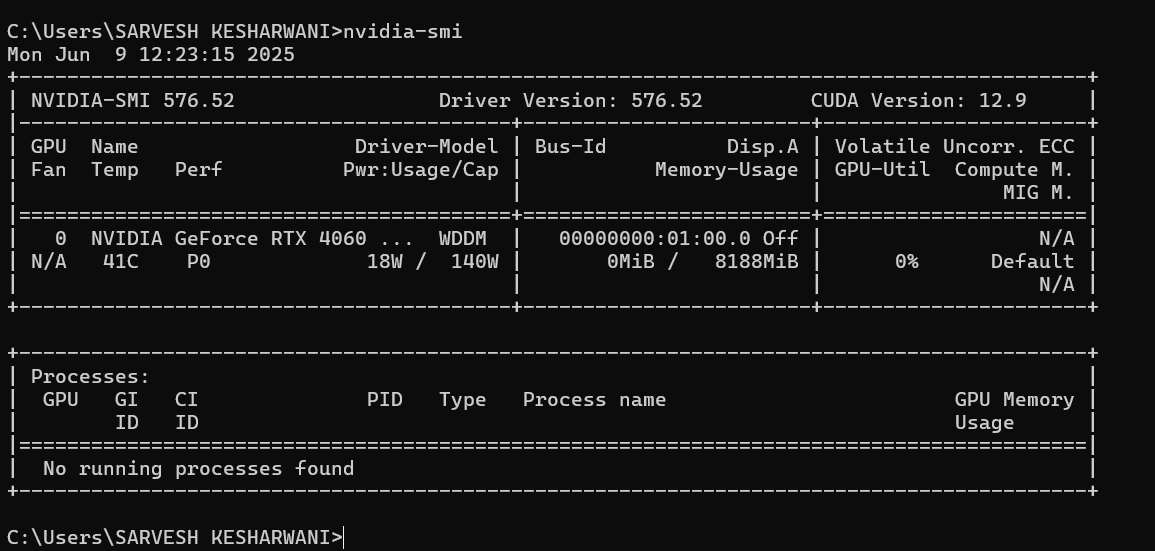

In [ ]:
# ! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu129

Looking in indexes: https://download.pytorch.org/whl/cu128


In [ ]:
# ! pip install torchsummary

In [ ]:
# ! pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/10.7 MB 8.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/10.7 MB 7.4 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/10.7 MB 6.9 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.7 MB 6.8 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.7 MB 6.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.1/10.7 MB 6.7 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.7 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.3/41.0 MB 7.4 MB/s eta 0:00:06
   -- ------------------------------------- 2.9/41.0 MB 7.4 MB/s eta 0:00:06
   ---- ----------------------------------- 4.5/41.0 MB 7.5 MB/s eta 0:00:05
   ------ --

In [ ]:
# ! pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 10.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 9.3 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 10.0 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.2 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.6 MB/s eta 0:00:00

   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ----------------------

In [10]:
import torch
# import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [13]:
import torch
import torch.nn as nn
print(torch.__version__)
print(nn.Linear(2,2))

2.7.1+cu128
Linear(in_features=2, out_features=2, bias=True)


In [31]:
data_df = pd.read_csv('riceClassification.csv')
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [32]:
data_df.shape

(18185, 12)

In [33]:
data_df.dropna(inplace=True)
data_df.shape

(18185, 12)

In [34]:
data_df.drop(['id'], axis=1, inplace=True)
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [40]:
print(data_df['Class'].unique())

[1 0]


In [41]:
print(data_df['Class'].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [42]:
original_df = data_df.copy()

In [ ]:
for col in data_df.columns:
    data_df[col] = data_df[col]